<a href="https://colab.research.google.com/github/R161627/Numpy_and_pandas/blob/main/Bollywood_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../content/bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [4]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [5]:
list(df.columns)

['SlNo',
 'Release Date',
 'MovieName',
 'ReleaseTime',
 'Genre',
 'Budget',
 'BoxOfficeCollection',
 'YoutubeViews',
 'YoutubeLikes',
 'YoutubeDislikes']

In [6]:
# How many records are present in the dataset? Print the metadata information of
# the dataset.
df.shape[0]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


Number of releases based on genre Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: MovieName, dtype: int64
Higest no of releases in a genre 36


<Axes: ylabel='MovieName'>

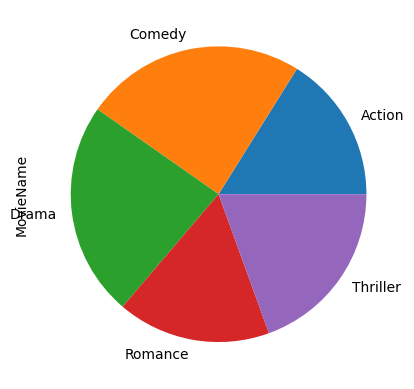

In [42]:
# How many movies got released in each genre? Which genre had highest number of releases? Sort
# number of releases in each genre in descending order.
#for removing whitespaces
df['Genre'] = df['Genre'].str.strip()
genre = df.groupby('Genre')['MovieName']
print("Number of releases based on genre",genre.count().sort_values(ascending = False))
print("Higest no of releases in a genre",genre.count().max())
genre.count().plot.pie()

In [54]:
#How many movies in each genre got released in different release times like long weekend, festive
#season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
print(df.groupby(['Genre','ReleaseTime']).count())
print('------------------------------------------')
print(pd.crosstab(df['Genre'],df['ReleaseTime']))










                      SlNo  Release Date  MovieName  Budget  \
Genre    ReleaseTime                                          
Action   FS              3             3          3       3   
         HS              3             3          3       3   
         LW              3             3          3       3   
         N              15            15         15      15   
Comedy   FS              3             3          3       3   
         HS              5             5          5       5   
         LW              5             5          5       5   
         N              23            23         23      23   
Drama    FS              4             4          4       4   
         HS              6             6          6       6   
         LW              1             1          1       1   
         N              24            24         24      24   
Romance  FS              3             3          3       3   
         HS              3             3          3    

In [59]:
#Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
#called month from ReleaseDate column.)
df['RelMonth'] = pd.DatetimeIndex(df['Release Date']).month_name()
df['RelYear'] = pd.DatetimeIndex(df['Release Date']).year
df.groupby('RelMonth')['MovieName'].count().sort_values(ascending=False).head(1)



,MovieName
RelMonth,
January,20
